In [1]:
import h5py
import hdf5plugin
import math
import numpy as np
import matplotlib.pyplot as plt


f = h5py.File("../Data/LPS/LPS_ST.h5",'r')   
my_spectra = []

keys = list(f.keys())
keys = sorted([int(key) for key in f.keys()])
print(keys)
coords = []
for key in keys:
        my_spectra.append([f.get(str(key))["x"][:],f.get(str(key))["y"][:]])
        coord = ((key-1) % 40, (key-1) // 40)
        coords.append(coord)

f.close()        
print(coords)

print(f"Number of spectra:",len(my_spectra))
print("Done adding to array!")    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [2]:
max_mz = -float('inf')
min_mz = float('inf')
for spectrum in my_spectra:
    max_mz = math.ceil(max(max(spectrum[0]),max_mz))
    min_mz = math.floor(min(min(spectrum[0]),min_mz))
print(f'Range of mz values:',(min_mz,max_mz))


common_mzs = np.arange(min_mz,max_mz,0.02)
binned = np.zeros((len(my_spectra), len(common_mzs)), dtype=np.float32)

for i, (mzs, intensities) in enumerate(my_spectra):
    indices = np.digitize(mzs, common_mzs) - 1
    for k, val in zip(indices, intensities):
        if 0 <= k < binned.shape[1]:
            binned[i, k] += val

del my_spectra

tic = binned.sum(axis=1, keepdims=True)
X = binned / tic



# Min-max normalization to [0, 1] range per pixel
X_min = X.min(axis=1, keepdims=True)
X_max = X.max(axis=1, keepdims=True)
X = (X - X_min) / (X_max - X_min + 1e-6)  # Adding a small epsilon to avoid division by zero

# Filter to only include m/z values between 150 and 1500
mz_mask = (common_mzs >=150) & (common_mzs < 1500)
X = X[:, mz_mask]
X = X[:,:len(X[0])-1]
common_mzs = common_mzs[mz_mask]

X = X.astype(np.float32)
print(f"Matrix created!")
print(f"Matrix has dimensions of", X.shape)

Range of mz values: (0, 2000)


/tmp/ipykernel_77473/2763579130.py:21: RuntimeWarning: invalid value encountered in divide
  X = binned / tic


Matrix created!
Matrix has dimensions of (1658, 67499)


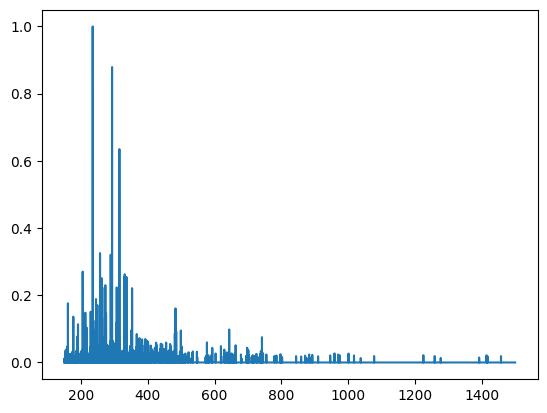

In [3]:
plt.plot(common_mzs[:len(common_mzs)-1],X[16])
plt.show()

In [4]:
name = f"../Data/LPS/lps_st.npy"

np.save(name, X)

In [5]:
name = f"../Data/LPS/lps_st_coords.npy"
np.save(name,coords)
name = f"../Data/LPS/lps_st_mzs.npy"
np.save(name,common_mzs)
